The data can be found here :
https://www.kaggle.com/volodymyrgavrysh/heart-disease
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [34]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import shutil as sh
import os
import project_2_dnn as run
%matplotlib inline
from sklearn import metrics
import seaborn as sns; sns.set(color_codes=True)

### Objective: 

<font color="magenta"> Target: AHD - Diagnosis of heart disease (1 = yes; 0 = no)</font>


The data can be found here:

https://archive.ics.uci.edu/ml/datasets/Heart+Disease
https://www.kaggle.com/volodymyrgavrysh/heart-disease

### Pre-process Data for k-fold evaluation:

In [6]:
data = pd.read_csv('heart.csv')
target = 'target'
features = list(data.columns)
features.remove('target')
print("Input layer size",len(features))

Input layer size 13


In [ ]:
for i in range(5):
    test_inds = np.append(np.random.choice((np.where(data['target']==0))[0], 40, replace=False), np.random.choice((np.where(data['target']==1))[0], 40, replace=False))
    train_inds = list(set(range(len(data['target']))) - set(test_inds))
    
    # Save Index
    np.savetxt(f"test_idx{i}.csv", test_inds, delimiter=",")
    np.savetxt(f"train_idx{i}.csv", train_inds, delimiter=",")


### Create 4 Model Structures :

In [ ]:

input_dim = 13
nums = range(0,4) # model ID
l1_array = [13,13,13,13] # first layer neurons
hidden_layers_array= [[7],[10,5,2],[8,4],[9,6,3]] # hidden layer n of neurons
num_hidden_layer_array = [1,3,2,3] # number of hidden layers
epochs = 100
model_num_1 = 0
model_num_2 = 4

### Train Models:

In [ ]:
run.train(input_dim,l1_array,hidden_layers_array,num_hidden_layer_array,epochs,
      model_num_1,model_num_2,features,target,data,'Train_Models')

### Evaluate Models :

In [2]:
model_name_list = ['Model_0',
                  'Model_1',
                  'Model_2',
                  'Model_3']

##### Model 0

In [13]:

sensitivity , specificity, auc, fpr, tpr, thresholds, acc = run.new_evaluate(model_name_list[0],data,features,target)

Model = pd.DataFrame({'sensitivity':sensitivity,
                      'specificity': specificity,
                      'auc': auc,
                      'acc': acc},
                     index = list(range(5)))

averages = pd.DataFrame({'sensitivity':[np.mean(sensitivity),np.median(sensitivity)],
                      'specificity':[np.mean(specificity), np.median(specificity)],
                      'auc': [np.mean(auc),np.median(auc)],
                        'acc': [np.mean(acc),np.median(auc)]},
            index = ['average','median'])

In [14]:
Model = Model.append(averages)

Model.to_csv(f"{model_name_list[0]}_eval.csv")

##### Model 1

In [10]:

sensitivity , specificity, auc, fpr, tpr, thresholds, acc = run.new_evaluate(model_name_list[1],data,features,target)

Model = pd.DataFrame({'sensitivity':sensitivity,
                      'specificity': specificity,
                      'auc': auc,
                      'acc': acc},
                     index = list(range(5)))

averages = pd.DataFrame({'sensitivity':[np.mean(sensitivity),np.median(sensitivity)],
                      'specificity':[np.mean(specificity), np.median(specificity)],
                      'auc': [np.mean(auc),np.median(auc)],
                        'acc': [np.mean(acc),np.median(auc)]},
            index = ['average','median'])
Model = Model.append(averages)

Model.to_csv(f"{model_name_list[1]}_eval.csv")

##### Model 2

In [11]:

sensitivity , specificity, auc, fpr, tpr, thresholds, acc = run.new_evaluate(model_name_list[2],data,features,target)

Model = pd.DataFrame({'sensitivity':sensitivity,
                      'specificity': specificity,
                      'auc': auc,
                      'acc': acc},
                     index = list(range(5)))

averages = pd.DataFrame({'sensitivity':[np.mean(sensitivity),np.median(sensitivity)],
                      'specificity':[np.mean(specificity), np.median(specificity)],
                      'auc': [np.mean(auc),np.median(auc)],
                        'acc': [np.mean(acc),np.median(auc)]},
            index = ['average','median'])
Model = Model.append(averages)

Model.to_csv(f"{model_name_list[2]}_eval.csv")

#### Model 3

In [12]:

sensitivity , specificity, auc, fpr, tpr, thresholds, acc = run.new_evaluate(model_name_list[3],data,features,target)

Model = pd.DataFrame({'sensitivity':sensitivity,
                      'specificity': specificity,
                      'auc': auc,
                      'acc': acc},
                     index = list(range(5)))

averages = pd.DataFrame({'sensitivity':[np.mean(sensitivity),np.median(sensitivity)],
                      'specificity':[np.mean(specificity), np.median(specificity)],
                      'auc': [np.mean(auc),np.median(auc)],
                        'acc': [np.mean(acc),np.median(auc)]},
            index = ['average','median'])
Model = Model.append(averages)

Model.to_csv(f"{model_name_list[3]}_eval.csv")

### Best Model :

When dealing with classifications problems one must not focus only on the accuracy of the model. A model that always classifies the majority class maybe 90% accurate. To deal with this issue we use other metrics.
* sensitivity: the ability of a test to correctly identify those with the disease ( TP / FN + TP) is the true positive rate).
* specificity: the skill of the model to correctly identify those without the disease (true negative rate)
* AUC (Area under the ROC Curve): provides an aggregate measure of performance across all possible classification thresholds.  (A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0)

<font color="magenta">The model with the best skill is Model 0 .</font>


In [22]:
results = pd.read_csv('Results.csv', index_col = 'ID')
results.drop('Unnamed: 5',axis =1, inplace = True)
results

,Sensitivity,Specificity,AUC,Accuracy
ID,,,,
Model 0,0.89,0.78,0.91,0.83
Model 1,1.00,0.00,0.50,0.50
Model 2,0.86,0.72,0.86,0.79
Model 3,1.00,0.00,0.50,0.50


### Evaluate Model 0 with Plots

In [51]:
test_inds = np.append(np.random.choice((np.where(data['target']==0))[0], 40, replace=False), np.random.choice((np.where(data['target']==1))[0], 40, replace=False))
train_inds = list(set(range(len(data['target']))) - set(test_inds))

In [59]:
model =  run.baseline_model(13,13,[7],1)
model.summary()

trainX= data.loc[train_inds][features]
trainy=data.loc[train_inds][target]

validX= data.loc[test_inds][features]
validy=data.loc[test_inds][target]

print(validX.shape,trainX.shape)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 98        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 8         
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________
(80, 13) (223, 13)


In [60]:
callbacks = run.myCallback()
history = model.fit(trainX,trainy, epochs = 400,
                            verbose = False,
                            validation_data = (validX,validy),
                            callbacks=[callbacks])


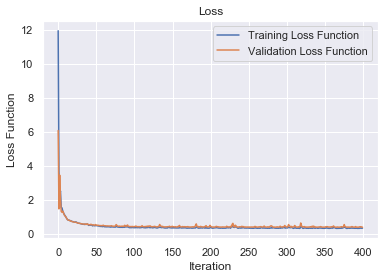

In [65]:
loss = np.asarray(history.history["loss"])
loss_val = np.asarray(history.history["val_loss"])
plt.plot(loss)
plt.plot(loss_val)
plt.title('Loss')
plt.xlabel("Iteration")
plt.ylabel("Loss Function")
plt.legend(['Training Loss Function','Validation Loss Function'])

In [70]:
P = np.array(loss)
print('The minimum Train loss happens on iteration', np.where(P == min(P))[0][0])
print(min(P))

The minimum Train loss happens on iteration 394
0.3371005046928945


In [71]:
P = np.array(loss_val)
print('The minimum Validation loss happens on iteration', np.where(P == min(P))[0][0])
print(min(loss_val))

The minimum Validation loss happens on iteration 394
0.40818588733673095


<font color="magenta"> THE IS NO SIGN OF OVERFITTING! </font>

In [82]:
from sklearn import metrics

new_y = model.predict(validX).ravel()
y_pred_class = np.array([round(x) for x in new_y])
confusion = metrics.confusion_matrix(validy, y_pred_class)
TN, FP, FN, TP = confusion.ravel()
sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
fpr,tpr,thresholds = metrics.roc_curve(validy,y_pred_class)
auc_keras = metrics.auc(fpr,tpr)
accu = metrics.accuracy_score(validy, y_pred_class)

In [85]:
print("Sensitivity:",sensitivity,"Specificity:",specificity,"AUC:",round(auc_keras,2),"Accuracy:",accu)

Sensitivity: 0.9 Specificity: 0.7 AUC: 0.8 Accuracy: 0.8


<font color="magenta"> I would say this is pretty good. It can always be better by using, feature selection, interaction, reduction methods. I wander how the performance will improve by standardizing the data. </font>